In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 199)

In [4]:
data = pd.read_csv('/Users/kavitha/Downloads/Admission Predictions.csv',parse_dates=True)
print("Data is loaded")

Data is loaded


In [5]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
data.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [10]:
all_cols = data.columns

In [11]:
all_cols

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit '], dtype='object')

In [12]:
space_cols = ['Serial No.','GRE Score','TOEFL Score','University Rating']

In [13]:
data.rename({'Serial No.':'Serial_No.','GRE Score':'GRE_Score',
              'TOEFL Score':'TOEFL_Score',"University Rating":"University_Rating",
            "Chance of Admit ":"Admit_chance"},axis = 1,inplace = True)


In [14]:
data.columns

Index(['Serial_No.', 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Admit_chance'], dtype='object')

In [15]:
data.duplicated().sum()

0

# Target Column Analysis

In [16]:
target = 'Admit_chance'

In [17]:
data[target].value_counts()

0.71    23
0.64    19
0.73    18
0.72    16
0.79    16
0.78    15
0.76    14
0.62    13
0.94    13
0.70    13
0.68    13
0.80    13
0.74    12
0.93    12
0.65    12
0.89    11
0.84    11
0.67    11
0.61    10
0.86    10
0.57    10
0.77    10
0.91    10
0.82     9
0.69     9
0.92     9
0.81     9
0.66     9
0.90     9
0.58     8
0.87     8
0.54     8
0.75     8
0.96     8
0.59     7
0.63     7
0.52     7
0.56     7
0.85     6
0.49     5
0.53     5
0.46     5
0.47     5
0.95     5
0.42     4
0.88     4
0.97     4
0.83     4
0.44     3
0.45     3
0.48     3
0.51     2
0.60     2
0.50     2
0.55     2
0.34     2
0.38     2
0.36     2
0.43     1
0.39     1
0.37     1
Name: Admit_chance, dtype: int64

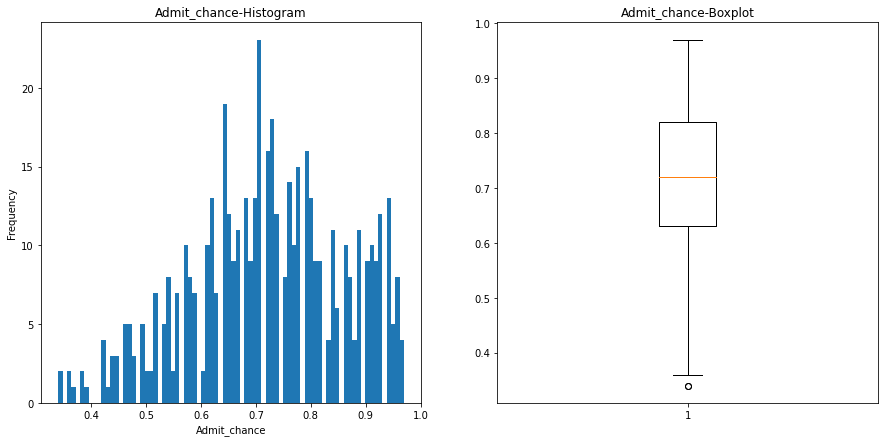

In [18]:
figs = plt.figure(figsize=(15,7))
ax1 = figs.add_subplot(121)
ax2 = figs.add_subplot(122)
ax1.set_title('Admit_chance-Histogram')
ax1.set_xlabel('Admit_chance')
ax1.set_ylabel('Frequency')
ax2.set_title('Admit_chance-Boxplot')
x = data[target]
ax1.hist(x,bins=80)
ax2.boxplot(x);

In [19]:
data[target].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.95,0.98])

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
10%        0.53000
25%        0.63000
50%        0.72000
75%        0.82000
90%        0.92000
95%        0.94000
98%        0.96000
max        0.97000
Name: Admit_chance, dtype: float64

In [20]:
data[target].skew()

-0.289966210041158

# Density plot - Numerical Attributes

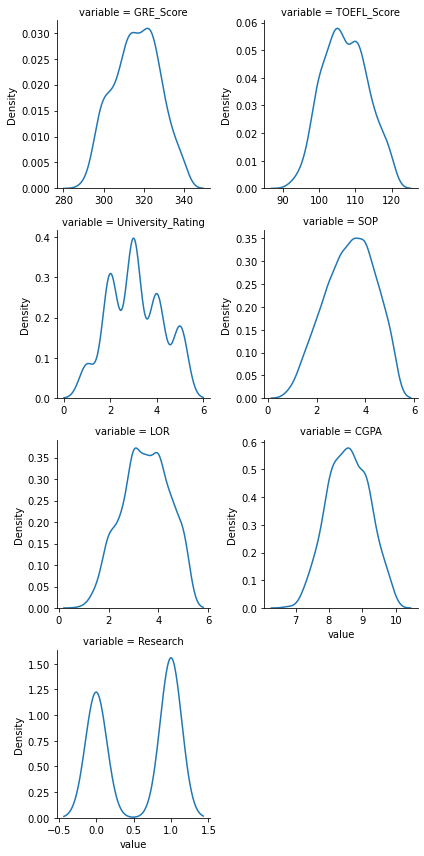

In [21]:
unpivot = pd.melt(data,data.describe().columns[-1],data.describe().columns[1:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=2, sharex=False, sharey=False)
g.map(sns.kdeplot, "value")

plt.show()

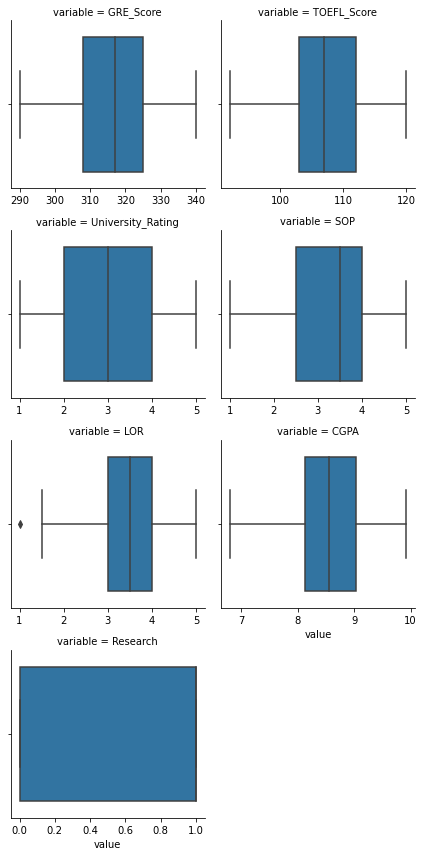

In [22]:
g = sns.FacetGrid(unpivot, col="variable", col_wrap=2, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

# Multivariate Analysis

In [23]:
df = data.copy()

In [24]:
df = df.drop('Serial_No.',axis=1)

In [25]:
df.sample(15)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admit_chance
434,306,103,3,3.5,3.0,8.21,0,0.64
274,315,100,1,2.0,2.5,7.95,0,0.58
489,302,110,3,4.0,4.5,8.50,0,0.65
99,323,113,3,4.0,4.0,8.88,1,0.79
215,330,116,5,5.0,4.5,9.36,1,0.93
248,324,110,3,3.5,4.0,8.87,1,0.80
380,322,104,3,3.5,4.0,8.84,1,0.78
387,307,105,2,2.0,3.5,8.10,0,0.53
391,318,106,3,2.0,3.0,8.65,0,0.71
468,323,110,4,4.0,5.0,8.88,1,0.81


<AxesSubplot:xlabel='GRE_Score', ylabel='Admit_chance'>

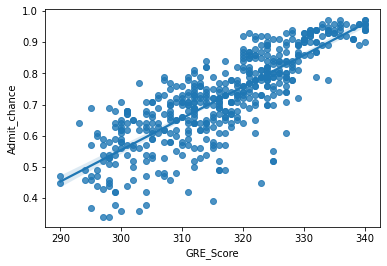

In [26]:
sns.regplot(x = 'GRE_Score', y = 'Admit_chance',data = df)

<AxesSubplot:xlabel='TOEFL_Score', ylabel='Admit_chance'>

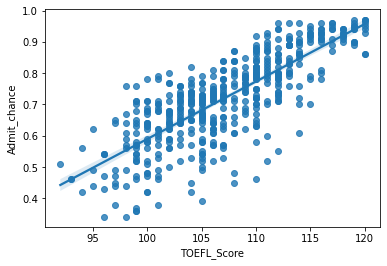

In [27]:
sns.regplot(x = 'TOEFL_Score', y = 'Admit_chance',data = df)

In [28]:
# checking for correlation

In [29]:
corr_df = df.corrwith(df['Admit_chance']).sort_values(ascending=False)
corr_df

Admit_chance         1.000000
CGPA                 0.882413
GRE_Score            0.810351
TOEFL_Score          0.792228
University_Rating    0.690132
SOP                  0.684137
LOR                  0.645365
Research             0.545871
dtype: float64

<AxesSubplot:>

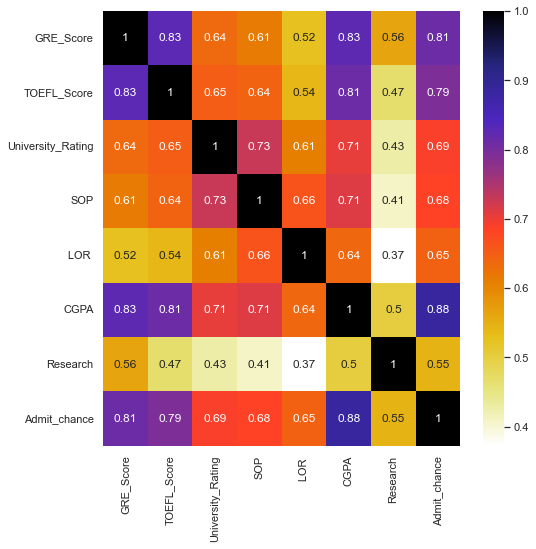

In [30]:
plt.figure(figsize=(8,8))
sns.set()
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

# Correlation factors


1. GRE score and Toefl score are correlated
2. CGPA tends to be corrrelated with Target variable
3. GRE score, Toefl score are correlated with CGPA

Thats assuming that person who is having CGPA tends to do well in GRE and Toefl

In [31]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [32]:
dg_num = df.select_dtypes(include = ['int64','float64'])

In [33]:
skewed_feats = dg_num.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness


Skew in numerical features: 



,Skew
TOEFL_Score,0.095314
University_Rating,0.090024
CGPA,-0.026533
GRE_Score,-0.039722
LOR,-0.144854
SOP,-0.228285
Research,-0.241747
Admit_chance,-0.289096


In [34]:
# Not much skewness with variables

<Figure size 720x720 with 0 Axes>

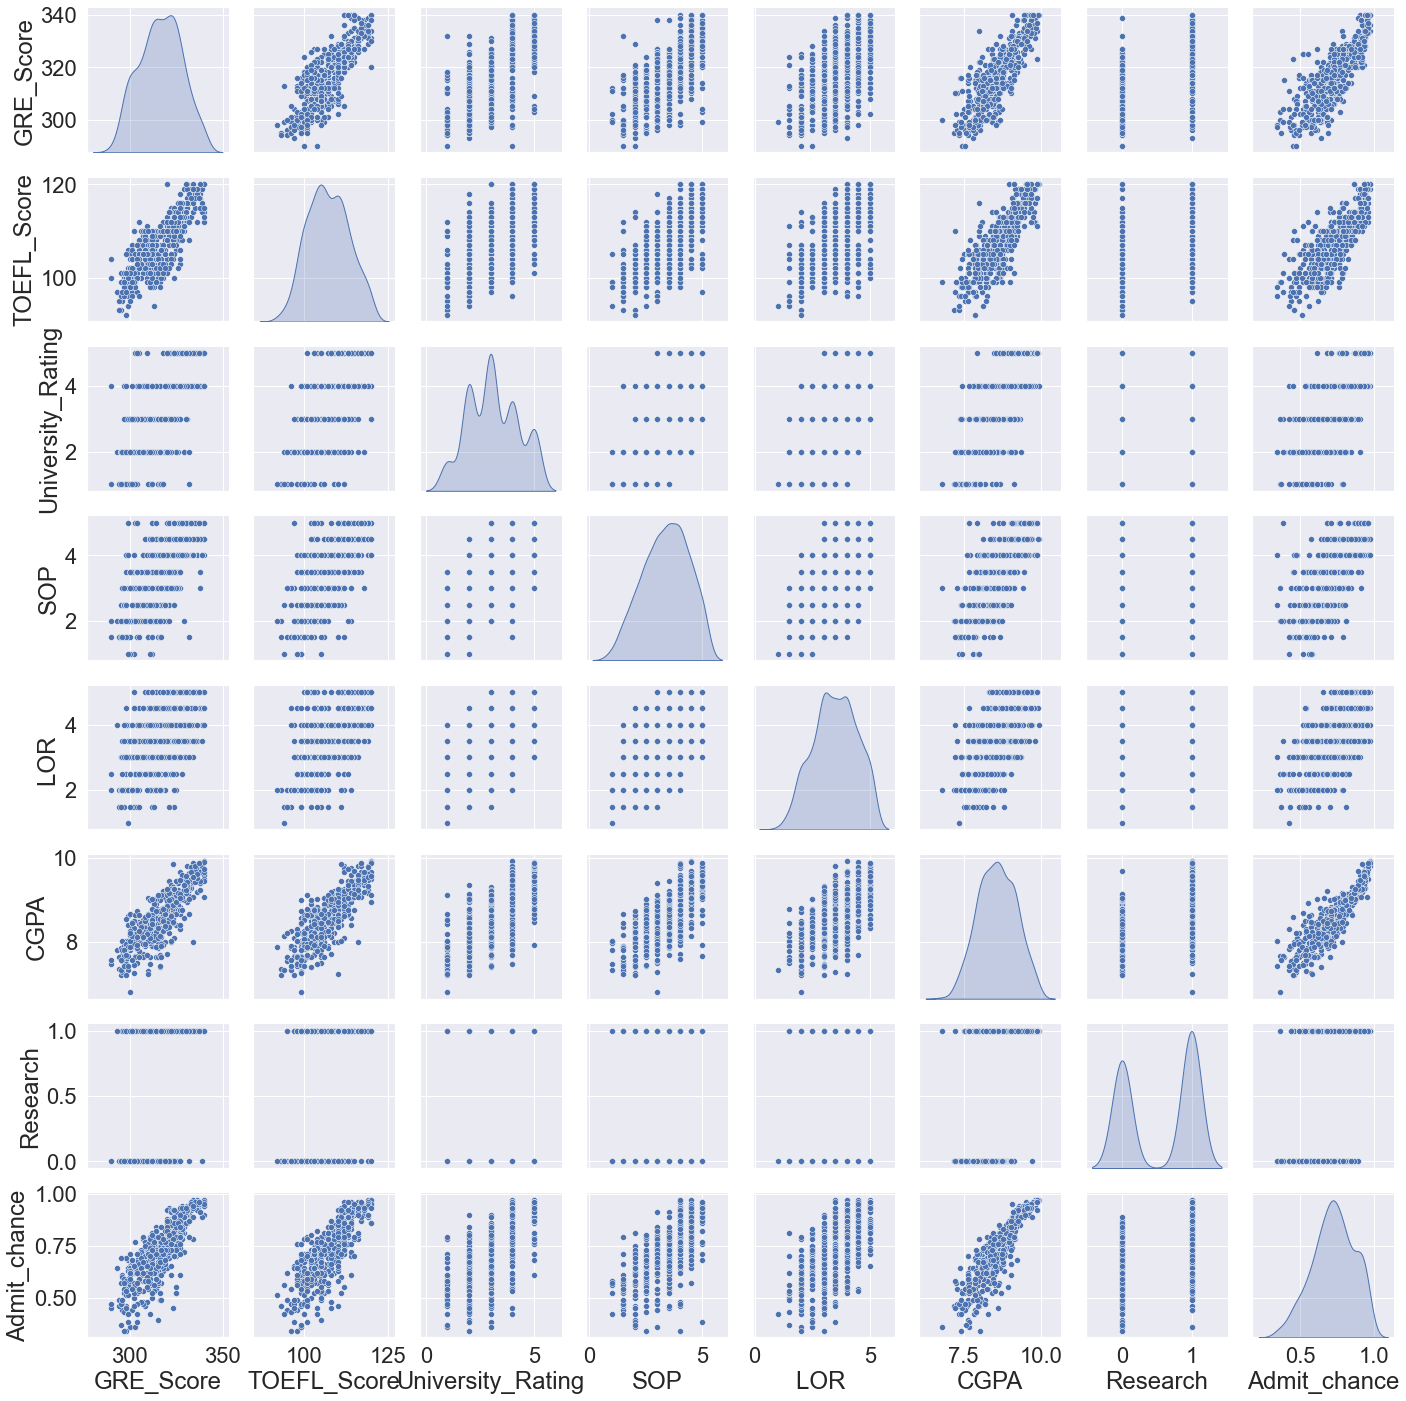

In [35]:
plt.figure(figsize=(10,10))
sns.set(font_scale=2)
sns.pairplot(df,diag_kind='kde')

Scaling

In [36]:
X = df.drop('Admit_chance',axis=1)
y = df['Admit_chance']

In [37]:
X.shape,y.shape

((500, 7), (500,))

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()

In [40]:
X_scaled = scaler.fit_transform(X)

In [41]:
X_scaled

array([[ 1.81923762,  1.77886545,  0.77558214, ...,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  0.77558214, ...,  1.09894429,
         0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441, -0.09979274, ...,  0.01730621,
        -0.95404281,  0.88640526],
       ...,
       [ 1.19888185,  2.10804114,  1.65095702, ...,  1.63976333,
         1.62785086,  0.88640526],
       [-0.39631872, -0.68995225,  0.77558214, ...,  1.63976333,
        -0.24236699, -1.12815215],
       [ 0.93301508,  0.95592621,  0.77558214, ...,  1.09894429,
         0.76721964, -1.12815215]])

In [42]:
import joblib

In [43]:
joblib.dump(scaler,'standard_scaler.sav')

['standard_scaler.sav']

# Modelling

Train Test split

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.22,random_state=43)

In [46]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((390, 7), (390,), (110, 7), (110,))

Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [48]:
lr = LinearRegression()

In [49]:
# fitting model
lr.fit(X_train,y_train)

LinearRegression()

In [50]:
y_pred = lr.predict(X_test)
y_pred.shape

(110,)

In [51]:
y_pred = lr.predict(X_test)  # Predictions
y_true = y_test # True values

MSE_lr= mean_squared_error(y_true, y_pred)
RMSE_lr = np.sqrt(MSE_lr)

MAE_lr = mean_absolute_error(y_true, y_pred)
RMAE_lr = np.sqrt(MAE_lr)

R_squared = r2_score(y_true, y_pred)

print("\nRMSE: ", np.round(RMSE_lr, 2))
print()
print("\nRMAE: ", np.round(RMAE_lr, 2))
print()
print("R-Squared: ", np.round(R_squared, 2))



RMSE:  0.06


RMAE:  0.22

R-Squared:  0.81


# XGBoost Regressor

In [52]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [53]:
#Instantiate an XGBoost object with hyperparameters
xgb_reg = xgb.XGBRegressor(max_depth=5, n_estimators=100, n_jobs=2,
                           objective ='reg:squarederror', booster='gbtree',
                           random_state=42, learning_rate=0.05)

# Train the model with train data sets
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test) # Predictions
y_true = y_test # True values

MSE = mse(y_true, y_pred)
RMSE = np.sqrt(MSE)

MAE = mae(y_true, y_pred)
RMAE = np.sqrt(MAE)

R_squared = r2_score(y_true, y_pred)

print("\nRMSE: ", np.round(RMSE, 2))
print()
print("\nRMAE: ", np.round(RMAE, 2))
print()
print("R-Squared: ", np.round(R_squared, 2))



RMSE:  0.07


RMAE:  0.22

R-Squared:  0.77


# Random Forest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [55]:
#Create a Gaussian Classifier
rf=RandomForestRegressor(random_state=0)
#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=0)

In [56]:
y_pred1 = rf.predict(X_test) # Predictions
y_true = y_test # True values

MSE = mse(y_true, y_pred1)
RMSE = np.sqrt(MSE)

MAE = mae(y_true, y_pred1)
RMAE = np.sqrt(MAE)

R_squared = r2_score(y_true, y_pred1)

print("\nRMSE: ", np.round(RMSE, 2))
print()
print("\nRMAE: ", np.round(RMAE, 2))
print()
print("R-Squared: ", np.round(R_squared, 2))



RMSE:  0.07


RMAE:  0.23

R-Squared:  0.75


In [57]:
# Linear Regression seems to be working good

In [58]:
import joblib

In [59]:
joblib.dump(lr,'model.sav')

['model.sav']